# CHAPTER 10 - SIMPLE LINEAR REGRESSION

## By Donovan Brown

## What does a Simple Linear Regression model do

#### It uses only one independent variable to predict the value of a dependent variable. It is used within predictive analysis.

In [7]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [9]:
data = sns.load_dataset('diamonds')

In [11]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Pearson Correlation Coefficient (r-value)
* Is a number between 1.0 and -1.0 that measures the type and strength of the linear correlation between two variables.
* When the r-value is close to 1.0 it indicates a  (strong) positive correlation.
* When the r-value is close to -1.0 it indicates a (strong) negative correlation.
* It only detects linear relationships, so if there are any other types of correlations they could be missed depending on r-values solely. You should use them along with scatterplots to identify correlations.
* You use the - corr()- method to find the r-value.
* When the variable is paired with itself the r-value is 1.0.
* If more than one I-VAR provides a moderate or stronger correlation with a D-VAR then you should use multiple linear regression.


In [34]:
data.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

In [42]:
data_drop = data.drop(columns=['cut','color','clarity'], errors='raise', inplace=True)

In [49]:
data

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [51]:
data.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


<Axes: >

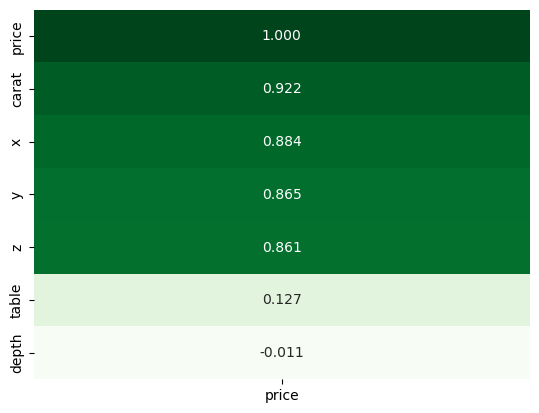

In [59]:
sns.heatmap(data=data.corr()[['price']].sort_values(by='price', ascending=False),
            annot=True, cmap='Greens', cbar=False, fmt=f'.3f')

## Procedure for Creating and Using a Regression Model

1. The dataset is split into a **training dataset** thats used to train the model and a **test dataset** thats used to validate the model using either random values or specific criteria and asigning to to either set.

2. The **training dataset** is used to create the regression model.

3. The **test dataset** is run against the model to see how accurate the results of the model are.

4. If the model is **valid** then you can use it to predict the **dependent variable** based on the independent variables. 

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [68]:
x_train, x_test, y_train, y_test = train_test_split(
    data[['carat']], data[['price']],
    test_size=0.30, random_state=20)

In [72]:
model = LinearRegression()
model

LinearRegression()

In [74]:
model.fit(x_train, y_train)

LinearRegression()

In [76]:
model.score(x_test, y_test)

0.8504107786474794

In [80]:
y_predicted = model.predict(x_test)
y_predicted

array([[9540.64191438],
       [1940.07543252],
       [3180.98424589],
       ...,
       [9618.19871522],
       [-464.18539337],
       [5507.68827094]])

In [108]:
p_column = ['Predicted_Price']

p_data = pd.DataFrame(
    data=y_predicted,
    columns=p_column)

p_data.head(3)

,Predicted_Price
0,9540.641914
1,1940.075433
2,3180.984246


In [164]:
p_values = pd.DataFrame(y_predicted, columns=['Predicted_Price'])

combined = p_values.join([x_test.reset_index(drop=True),
                          y_test.reset_index(drop=True)])
combined.head()

,Predicted_Price,carat,price
0,9540.641914,1.52,8674
1,1940.075433,0.54,1637
2,3180.984246,0.70,2657
3,2327.859437,0.59,1838
4,4421.893059,0.86,2980


In [166]:
p_melt = pd.melt(combined, id_vars=['carat'],
                 value_vars=['price' ,'Predicted_Price'],
                 var_name='price_type', value_name = 'price_value')
p_melt

,carat,price_type,price_value
0,1.52,price,8674.000000
1,0.54,price,1637.000000
2,0.70,price,2657.000000
3,0.59,price,1838.000000
4,0.86,price,2980.000000
...,...,...,...
32359,0.31,Predicted_Price,156.269013
32360,1.01,Predicted_Price,5585.245072
32361,1.53,Predicted_Price,9618.198715
32362,0.23,Predicted_Price,-464.185393


/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


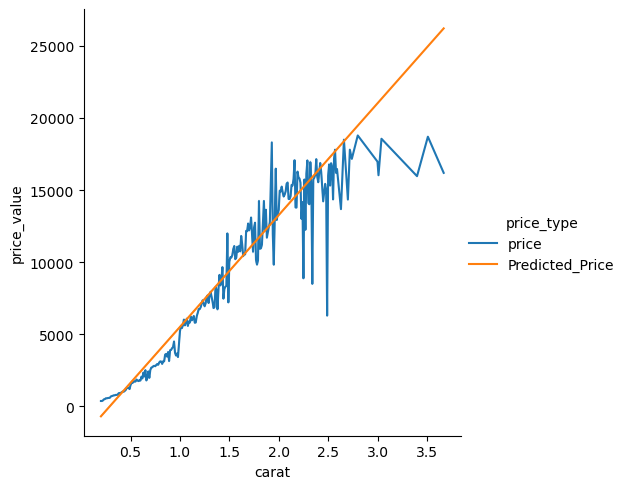

In [207]:
sns.relplot(data=p_melt, kind='line', x='carat', y='price_value', ci=0,
            hue='price_type')

## Regression line equation is y=mx+b where...
* y is the **depdendent** variable
* m is the **slope** of the line
* x is the **independent** variable
* b is the **Y-interept**

In [172]:
X = data.carat.values.reshape(-1,1)
y = data.price

In [174]:
lr = LinearRegression()
predicted = lr.fit(X,y)

In [227]:
m = predicted.coef_
b = predicted.intercept_
print(f'The slope is {m} and the y-intercept is {b}')

The slope is [7756.42561797] and the y-intercept is -2256.360580045403


In [231]:
print(f'Regression line equation is y = {m} x+ {b}')

Regression line equation is y = [7756.42561797] x+ -2256.360580045403


In [259]:
predicted_price = (m * 0.70 + b)
print(f"The predicted price for a 0.70 carat diamond is ${predicted_price[0]:.2f}")

The predicted price for a 0.70 carat diamond is $3173.14


In [261]:
predicted_price = (m * 0.54 + b)
print(f"The predicted price for a 0.54 carat diamond is ${predicted_price[0]:.2f}")

The predicted price for a 0.54 carat diamond is $1932.11


**YES THEY ARE CLOSE TO THE RESULTS IN STEP 18**